**Welcome to Computational Cognitive Neuroscience**

This notebook will walk you through the most important commands, functions and concepts you will need for the programming part of the course. If you have troubles following the material presented here or the exercises, you will most likely struggle with the labs and programming exercises in the assignments. However, to improve your underestanding of python as a language or basic programming concepts, you can look for tutorials online e.g. https://www.youtube.com/watch?v=_uQrJ0TkZlc (this starts at the most basic concepts like if statements and defining variables). 


**1. Define variables**

Variables are value stores you can reference by name. In order to name a new variable you can simply type: 

In [1]:
x = 4     #variable with name x has value 4 in memory
y = True  #bool

#check type of x nd y
#print will print output in the space beneath the cell. Great to check results. 
print('Native type of variable x is:' + str(type(x)))
print('Native type of variable y is:' + str(type(y)))

#you can compute with both of them, but be careful which type the result is: 
v = x * y
print(v)
print('Native type of variable v is:' + str(type(v)))

Native type of variable x is:<class 'int'>
Native type of variable y is:<class 'bool'>
4
Native type of variable v is:<class 'int'>


*Attention*: Python does not (always) type check as the last computation above shows. This means that you can change the type of the variable without explicitly noticing it. Be careful that you always have the right type (int, float, boolean, string, etc.) when computing with multiple different types. 

**2. Numpy - The tool for effecient array computations**

The basic module we will be using is numpy. It is a comprehensive library based on matrix operations including the most important mathematical tools. It has been defined to be similar to Matlab and therefore it is easy to swtich from Matlab to Python with numpy for most. A rule of thumb is: If you need a defined mathematical operation or concept like standard devation, histograms, or computing eigenvalues of a matrix, there will be a native numpy function for it already. Simply google for it to find the exact function name and argument list in the numpy documentary. E.g. try googling "eigenvalues numpy" to find the specifications of how to compute eigenvalues with numpy. The link is also provided below. 

General documentation with links to numpy tutorials: 
https://numpy.org/doc/stable/

Example for a function to compute eigenvalues of a matrix: 
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

**2.1 Import modules such as numpy, matplotlib and seaborn**

Try executing the cell below to import the numpy module. 

In [3]:
import numpy as np                 #load module to be able to call functions as np.functionname()

If you get an Error as output looking like this **Error:"No module named numpy"** follow the steps described below to install the missing module. 

We recommend to use pip to install numpy. If you are using a conda environment, you can also use the conda install in your command line. Both ways are explained here: https://numpy.org/install/
Open up a terminal and type in your comand line:

*pip install numpy*

Also go ahead and install the two modules we will be using for plotting: 

*pip install matplotlib*

*pip install seaborn*

**2.2 Working with numpy**

We will be using numpy arrays as data structure. Matrices do exists in numpy but are limited in their functionality. Therefore whenever the word "matrix" is used in this tutorial, we will refer to a native numpy.ndarray. 

The standard data type of numpy arrays is float. This can be troublesome if you try to use them for indexing. However you can change the standard type by specifying the dtype in function calls. E.g. specifying dtype = 'int' will return an array with int entries which can be used to index another numpy array. 

Matrices of appropriate size can be added, subtracted and multiplied in the linear algebra sense using +, - and @ (or np.matmul). * or np.multiply() will result in elemtwise multiplication. For two 1D arrays np.dot() returns the inner product. np.outer() returns the outer product of the input arrays. You need to be careful with this operation when you arrays which have dimensions > 2 as input. Any array with dimensions > 2 will be flattened before computing the outer product. np.transpose(array), array.transpose() and array.T will transpose the array. 

*Examples:*

In [4]:
#define a matrix
x = np.array([[1,3],[2,4]])
print(x)

#in numpy it is easier to define row vectors to have shape 1x3 and column vectors will have shape 3x1 and are still matrixes. 
#array.shape will return the shape of the array 
#it is equivalent to calling the function np.shape(array)

#row vector
a = np.array([[1,2,3]])
print(a.shape)

#column vector
b = np.array([[1],[2],[3]])
print(b.shape)

#concatenate vecotors (use built in function) and pay attention that shape is cosistent for concatenation
c = np.concatenate([a,b.T])
print(c)

#special matrix functions: 
#will give you a predefined matrix of the arguments size -> have a look at the documentation of the functions to figure out what the do
nulls = np.zeros([5])

ones = np.ones([3,6,5])

identity = np.identity(5) 


[[1 3]
 [2 4]]
(1, 3)
(3, 1)
[[1 2 3]
 [1 2 3]]


*Exercises:* 
1. Create a variable a with value 1
2. Create an array of size 10 x 10 with all entries being 0. 
3. Create an array of size 10x20x30. Check the size of A. How does the native function len() differ from the numpy array.shape attribute or np.shape(array) function? How can you efficiently compute the number of all elements in an numpy array? 
4. Create a 10x5 matrix A of ones and a 5x1 vector x of ones. Multiply A and x. Why does A * x return an Error? How can you fix this? What does np.outer(A,x) compute? 
5. Create a vector x = [1,2,3,4,5]. Try multiplying x @ x.T and x.T@ x What does x*x compute? How can you compute the outer product of x with itself? 
*Tip*: Look up what the function np.arange() does. 


In [6]:
###Write your code here

**2.3 Indexing**

Indexing is used to access a subset of the elements of an array. For example, given a set of time series strored in a 2D array, one might wish to extract the set of time samples for a single variable, or the set of variables at a single time sample. Like many other programming languages, Python indexing starts counting at 0.

There are 3 major ways how to index arrays: 
1. Subscript indexing: To access a single value you can call it by their exact position along each dimension. All dimensions need to be accounted for in the call. E.g. A[2,3] returns the value of the 4th element of the 3rd row. 

2. Linear indexing/ slicing: To access multiple values or return a part of an array, you can specifiy which slice of the array you would like to return. E.g. A[2:8] of a 1-dimensional array will return all elements starting at the 3rd element until the 7th element (last index is excluded). To call all element of a specific dimension use [:], e.g. A[:,8] will give you the complete 9th row of a 2-dimensional array. You can also use negative index to start counting at the end A[-2] will return the 2nd to last value of array A. 

3. Tuples of indeces for each dimension: This is specifically practical for filtering the array for a specific condition. E.g. you want to only get the values of array A which are bigger than 1. Use np.where(A > 1) to return a tuple of the index for all values bigger 1. You can also directly use the condition as index writing A[A > 0]. 

*Examples:* 

In [7]:
A = np.random.randn(10,6)
print(A)

#get the 3rd element of the 2nd row
print(A[1,2])

#print the 5 column of A
print(A[:,4])

#print a subset of the 1st column. Here we print the values starting at the 4rt element and stop before the 2nd to last element
print(A[3:-2,0])

#print the 2nd to last element of the 1st column of A. Why was it not included in the subset printed before? 
print(A[-2,0])

#print all values bigger 0
print(A[A > 0])


#return indexes of all values bigger than 0
rows, cols = np.where(A > 0)
print(rows, cols)

#use these to print all values bigger 0
print(A[rows, cols])

#use index tuple of np.where()
all_dims = np.where(A > 0)

#both can be used for indexing and are equal in their results: 
print(np.all(A[rows, cols] == A[all_dims]))
#np.all() returns True if all entries of the array are True, otherwise it returns False


[[ 1.49615688 -0.62814647  0.7014297  -0.31083986 -1.13705658 -0.32650086]
 [-0.3207024   0.99898805  0.14233469 -1.49561231 -0.58188058 -0.25646618]
 [ 0.40732661  1.33068984  1.66280675  0.72117666 -0.52661199 -1.8522562 ]
 [ 0.51671204  1.01471511  1.04406253  0.94871187 -0.21655268 -0.38952712]
 [ 0.0672306  -0.16335798 -1.56767959  0.46254271  0.77468511  0.25916385]
 [-1.16268279  0.57199056  0.70135228 -0.13372021  0.43906393  1.1528434 ]
 [ 2.22656829 -1.22469629 -0.56995014 -0.41647378 -1.46377291  0.22987738]
 [ 0.44993794 -0.79050928  0.19618163 -0.2225414   0.44862591 -1.07333407]
 [ 1.20382184  0.06116717  0.27988857  1.17014302 -0.58534145  0.39007102]
 [-0.72834758  0.32026646 -0.31354007 -1.24502811 -0.76826471  0.51632318]]
0.1423346850393753
[-1.13705658 -0.58188058 -0.52661199 -0.21655268  0.77468511  0.43906393
 -1.46377291  0.44862591 -0.58534145 -0.76826471]
[ 0.51671204  0.0672306  -1.16268279  2.22656829  0.44993794]
1.2038218447850384
[1.49615688 0.7014297  0.9

*Exercises*

Create a random array A (use np.randn(size)) with size 10x50x3x15. 
Use two different ways to print all negative entries of A. How does the result from np.where(A) depending on the number of variables you store the result in. 

Read the documentation on np.nonzero(). Can you use it to index all nonnegative entries of A. How does np.nonzero() and np.where() differ? 

In [8]:
###Write your code here

**3. Loops and Conditional statements**

Loops are used to create an iterative process. Essentially the same operation is repeated until the loop terminating statement is fulfilled. 
There are two different loops: 

*while(condition)* loop: The computation in the loop is run as long as the condition is true. If the condition is always True this creates an endless loop. 

*for(x in y)* loop: Repeats the computation whithin the loop len(y) times. The values of x can be used within the loop. We will extensively use *for* loops in this course. 

In addition to this there are also *condition statements*: 

*if(condition): ...*
    

*if(condition): ... else: ...* 
    
   
 
*if(condition1): ... elif(condition2): ... else: ...*


There is a range of other *flow control* statements such as *break* and  *match*. We wont need them in this course. But they are usefull to further control the looping behaviour , e.g. break ends a loop prematurely or are a simplification for multiple nested *if...else* statements. If you like to know more have a look at the documentation: https://docs.python.org/3/tutorial/controlflow.html

*Example*

Compute the squares for 1 to 5

*Tip*: Remember python starts counting at 0!

In [9]:
for i in range(1,5+1): 
    print(i**2)
    
#with an array: 
times = np.arange(1,5+1) #creates array with entries 1 to 5
for i in times: 
    print(i**2)

1
4
9
16
25
1
4
9
16
25


*Exercises*

1. Compute a 10x1 array of size where each entry is the square of its index. 

2. Compute a 5x4 array where each entry is the product of the its two indeces. 

3. Compute a 20x1 array where each entry is sum of the last two entries where A[0] = 0 and A[1]= 1. *Tip: Pay attention to the maximum index of the array*

In [10]:
###write your code here

**4. Plotting interpretable plots**

The ability to create interpretable and well-labeled plots is essential to this course. Creating highquality plots typically involves plotting multiple things on the same graph, colour coding or otherwise distinguishing the various quantities plotted, clearly labeling using axes and legends with legible fontsize, making multiple subpanels within an overall figure, and using different kinds of data representation including heatmaps and histograms. We wil now briefly cover each of these concepts in Python using matplotlib.pyplot and seaborn as modules. 

If you are already familiar with matplotlib as plotting tool, you wont need to work through this section. Seaborn is an addition to matplotlib which results in better legible and aestathically more pleasing plots, but does not change the handles or syntax of most plotting functions. However, have a look at seaborn.heatmaps() function to familiarize yourself with it. 

*Note:* To improve illegibility for all, we set the colour palette (selection of colours used for plotting) to be suitable for colourblind readers as well. 


In [31]:
import matplotlib.pyplot as plt   
import seaborn as sns              
sns.set() #activate the seaborn aesthatics

#change the colour palette to be colour blind friendly
sns.set_palette("colorblind")
sns.color_palette("colorblind")  #shows you the color palette used now


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

*Lineplots*
As a first example on how to structure and present your data, we will be creating line plots. For this you can just call plt.plot(data). But there are a few tricks which allow you to create mutliple lineplots within the same figure. 

As example data we will be using randomized values and pretend that they are the data of a time dependent process. For the sake of creating annotations, we assume we measured 4 variables of this process: membrane potential in mV, external current in pA, temperature in C and the external calcium concentration in mM over 100ms.

The most simple plot is created like this: 
We will create a figure and axis of a single subplot. Then we use the axis to plot the data we have created. 

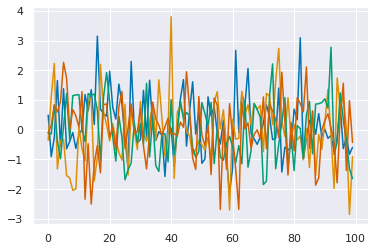

In [27]:
#create Data
Data = np.random.randn(100,4)

#create a figure and axes
fig, ax = plt.subplots(1,1)
#plot as lineplot, each dimension is one line in the plot
ax.plot(Data)
#show figure
plt.show()

Why is this a bad plot? 

*Write your thoughts here*

To improve the plot, we will be adding a legend, change the figure size, split the data in two subplots and add axis description as well as plot titles. You can also change the fontsizes explicitly in each command. *Exercise: Identify which command or handle does each of those things.*

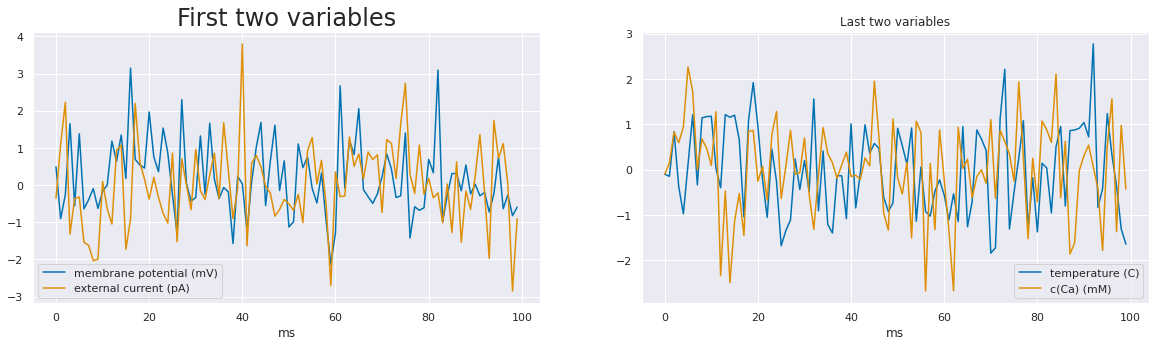

In [28]:
improved_fig, improved_ax = plt.subplots(1,2, figsize = (20,5))
improved_ax[0].plot(Data[:,0], label= 'membrane potential (mV)' )
improved_ax[0].plot(Data[:,1], label= 'external current (pA)' )
improved_ax[1].plot(Data[:,2], label= 'temperature (C)' )
improved_ax[1].plot(Data[:,3], label= 'c(Ca) (mM)' )
improved_ax[0].set_xlabel('ms')
improved_ax[1].set_xlabel('ms')
improved_ax[0].set_title('First two variables', fontsize = 24)
improved_ax[1].set_title('Last two variables')
improved_ax[0].legend()
improved_ax[1].legend()
plt.show()


This plot looks less confusing than the first one. 

*Exercise: Now try to plot each variable in their own subplot and change the y-axis of each subplot to display the unit of the displayed variable. Save your figure as .png and .pdf.*

*Tip:* Look up what plt.rc('text', usetex = True), plt.rc('font', family = 'serif'), plt.rcParams['axes.labelsize'] = 14, plt.rcParams['xtick.labelsize']=14, plt.rcParams['axes.titlesize'] =16 do. Can they help you get rid of redundant code? You will have to use these **before** you create your figure. Play around with the values to see their effect and find good standard values for your figures. 

figure.save() can help you to save your plot in different formats. 

In [29]:
###Write your code here

There is a plethora of plots you can create with this schema. Try plotting a heatmap of the data. The cell below shows you how to use the sns.heatmap() function. Also, try out other plots of the matplotlib and seaborn packages, e.g. plot data as a surfaceplot, as a histogram or plot categorical data as barplots. Are you able to create a figure with 4 subplots where each subplot shows the same data as a different plot? 

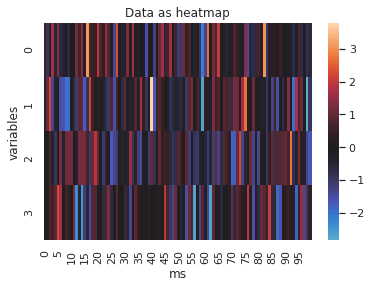

In [30]:
#to create a heatmap: 
fig_hm, ax_hm = plt.subplots(1,1)
hm = sns.heatmap(Data.T, ax = ax_hm, cbar = True, center = 0)
ax_hm.set_xlabel('ms')
ax_hm.set_ylabel('variables')
ax_hm.set_title('Data as heatmap')
plt.show()

### Write you code here

**5. Writing functions**

With every operation so far, we have used function calls. But you can also create your own functions in order to group computations together. Functions have inputs and outputs. Using functions will make your code more readable and easier to debug, especially if you have to run the same computation multiple times with different parameters, defining a function will save you a lot of time. 
Below you can see an example of self-defined function. 

For good practice, you define functions first and keep the code clearly structured. However, the function needs to be in the memory in order to be callable. This means, that you can define a function in a later cell, if you execute this cell first and then execute the cell which uses the function to compute something. For automatic execution it is better to keep a clear structure and have all definitions before any executions. 

A typical good code structre is: 
1. Module import , e.g. import numpy as np
2. define function, e.g. def functionname(inputs): return None
3. define parameter values and variable names
4. code to run 
5. plot results of computations


In [16]:
def myfun(input1, input2, input3): 
    
    output = (input1 * input3)/input2
    
    return output

**6. Vectorisation**

Numpy was specifically created to take advantage of matrix and vector operations. Therefore using linear algebra and matrix multiplication ("vectorisation") is more effecient than creating writing loops, iterating over each entry of the arrays. However, the improvement in efficiency typically come at the cost of readability, as the resulting linear algebra expressions can sometimes appear inscrutable. Making sure to write comments and choose appropriate variable names etc. can help here. 

There is also a tradeoff between the time spent vectorising your code and the time saved in running it. If your code is running in a reasonable time, it may not be worth your time to vectorise your code. However, in certain situations the improvement in run time can be substantial and the time spent vectorising can save you a lot of time in the long run, e.g. when you have to repeat the vectorised computation multiple times with changing parameter values. 

To compute the run time of a function or some arbitratry operations you can use this code snippet: 

In [17]:
import timeit

start = timeit.default_timer()

#Your function calls and operation here

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  1.8960010493174195e-05


*Attention: You will need to have installed timeit. If you have not install it over pip as mentioned above.*

**7. Parallelisation**

Another way to imporve run time on loops is to use parallelisation. A parallel for loop runs through different elements of a for loop simultaneously accross multiple cores of your processor (or GPU). This requires the joblib module. Again use pip or conda to install joblib, but you can easily get by without parallel computing. 

In order to replace a for loop with the joblib command, you will define a function you call with the parameters defined by the joblib call. The nice thing about jolib is that the definition of the parameter values to use it is really similar to the looping condition of a for loop. Joblib will return a tuple of the ordered results. This means that the result of the first parameter will be the first element in the returned tuple. Here is example code for computing the squares for 0 to 99 using joblib instead of a for loop and comparing the runtime of both versions: 

In [18]:
import joblib

def my_sqr(val): 
    
    sqr = val**2
    
    return sqr

values_to_compute = np.arange(0,100)  


start = timeit.default_timer()
loop_sqrs = np.zeros([values_to_compute.shape[0]])

for i in range(values_to_compute.shape[0]): 
    loop_sqrs[i] = my_sqr(i)

stop = timeit.default_timer()
print('Loop time: ', stop - start)

start = timeit.default_timer()

paralell_sqrs = joblib.Parallel(n_jobs=-1, backend="threading",verbose=1)(joblib.delayed(my_sqr)(value)for value in values_to_compute)

stop = timeit.default_timer()

print('Parallel time: ', stop - start) 


##Extra vecotorised version using the built-in numpy function for arrays

start = timeit.default_timer()    
vectorised_sqrs = np.power(values_to_compute, 2)
stop = timeit.default_timer()
print('Vectorised time: ', stop - start)   

Loop time:  0.00016749498900026083
Parallel time:  0.009311362984590232
Vectorised time:  7.727500633336604e-05


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


Can you explain why the parallel code here is slower than the loop? Would you expect this if you perform more complex computations? 

**Extra: Trick for automatic checks**

Python has built-in autocheck functions. They are handy to make sure your code is running smoothly without executing it multiple times and printing different variables or to check if the input is in the correct format. 

The easiest to use is the *assert* statementt. It is used to check if a condition is fulfilled. If the assert evaluates to **False** the call is terminated and returns an AssertionError. You can find examples for both cases below. 

You can also decide to specifically handle Errors and Exception with calls *try*, *except* and *raise*. This will not be needed for this course! However, if you would still like to have a look on how this would work have a look at the documentation here: https://docs.python.org/3/tutorial/errors.html

In [19]:
x = np.zeros([3,2])

y = np.random.rand(3,2)

#check if x and y have the same shape
assert x.shape == y.shape

#no output means that the condition is fulfilled

z = np.random.rand(4,8)
#chack if y and z have the same shape
assert y.shape == z.shape

AssertionError: 